# Todo : 
 1. Trouver d'où viennent les nans : 
     1. Est-ce les bébés de moins 1 ans plus présent en 4 eme interrogation ?
 
 
 
 
 
 
### Secondary TODO : 
    1. Trouver d'ou viennent les +inf dans les revi

In [1]:
%matplotlib inline

Variable calendrier d'activité :
    1. Actif
    2. Etudiant
    3. Chomeur
    4. Retraite
    5. Homme au foyer
    6. Autre Inactif

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
pd.core.series.Series.value_counts.im_func.func_defaults = (True, False, False, None, False)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
#pd.set_option('display.width', 200)
#pd.set_option('display.height', 100)

In [3]:
import matplotlib.pyplot as plt

In [4]:
file_path = "/Users/adrienpacifico/openfisca/Data/openfisca_data_2009.h5"
tmp_file_path = "/Users/adrienpacifico/openfisca/Data/ofsc/tmp/erfs_mensualized.h5"

In [5]:
pd.HDFStore(tmp_file_path)

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/adrienpacifico/openfisca/Data/ofsc/tmp/erfs_mensualized.h5
/enfants_a_naitre_2009                       frame        (shape->[1079,8])   
/famc_2009                                   frame        (shape->[112769,2]) 
/final2                                      frame        (shape->[112360,9]) 
/final2bis                                   frame        (shape->[112359,9]) 
/final3                                      frame        (shape->[112359,24])
/final4                                      frame        (shape->[112359,24])
/final_2009                                  frame        (shape->[112360,8]) 
/fipDat_2009                                 frame        (shape->[2463,29])  
/foy_ind_2009                                frame        (shape->[76470,237])
/ind_vars_to_remove_2009                     series       (shape->[1])        
/indivi_step_06_2009                         frame        (shape->[112846,2]) 
/indivim_2009   

In [6]:
### Regarde les différences de salaires entre déclaré dans l'IR et dans l'EE.

#df = pd.read_hdf(tmp_file_path,"/indivi_step_06_2009");
#df2 = df[(~df.sali.isnull()) & (~df.salred.isnull())]
#df2['salred'] = df2['salred']*12
#df2["diff_sal"] = (df2.sali - df2.salred)
#df2["relative_diff_sal"] = (df2.sali - df2.salred)/df2.sali
#df2[['diff_sal','sali','salred','relative_diff_sal']]

#discr = 60
#df2[(df2.relative_diff_sal<discr) & (df2.relative_diff_sal>-discr)].relative_diff_sal.mean()
#df2.diff_sal.hist(bins = 5200)

#plt.xlim([-7000,7000])
#plt.ylim([0,10000])
#df2.relative_diff_sal.hist()

In [7]:
df = pd.read_hdf(tmp_file_path,"/stat_des_adrien_2009")
original_df = pd.read_hdf(tmp_file_path,"/stat_des_adrien_2009")

* Les individus dans EE&FIP sont les individus dans le fichiers fiscal et l'enquête emploi.
* Les individus dans EE_NRT sont des étudiants vraissemblablement attaché au foyer fiscal de leurs parents $\rightarrow$    changent rien pour les impots
* FIP que dans le fichier des impots, pas dans l'eec pas de calendrier d'activité... soit a dropper, soit considérer que leurs revenus sont stables...
* EE_CAF, pas dans fichiers imposables, mais matché avec fichiers CAF ( constitué à 38% d'Etudiants,15% d'inactifs, 10% de chomeurs, 5% d'actifs).

In [8]:
df.quelfic.value_counts() #df[df.quelfic == 'EE_CAF']['situation_mois1'].value_counts() (pour composition de EE_CAF)

FIP        0.003722
FIP_IMP    0.024104
EE&FIP     0.943197
EE         0.019797
EE_NRT     0.004094
EE_CAF     0.005087
dtype: float64

In [9]:
df = df.drop(df[df.quelfic == 'FIP'].index)

TODO: Changer les poids pour prendre en compte les droppé.

In [10]:
df.quelfic.value_counts()

FIP_IMP    0.024194
EE&FIP     0.946721
EE         0.019871
EE_NRT     0.004109
EE_CAF     0.005106
dtype: float64

In [11]:
df.wprm.sum()/10**6

61.254595999999999

#### Nombre d'individus par fichiers.

In [12]:
piv_quelfic_wprm = pd.pivot_table(df, values='wprm', index=[df.index],
                     columns=['quelfic'], aggfunc=np.sum).sum()  ; piv_quelfic_wprm

quelfic
EE          1150260
EE&FIP     57939884
EE_CAF       348202
EE_NRT       301879
FIP_IMP     1514371
dtype: float64

In [13]:
df["revi"] = df[["revi_mois{}".format(month) for month in range(1,13)]].sum(1)
df.revi[df.revi< 10**8].head(2)

0    0
1    0
Name: revi, dtype: float64

#### Revenu moyen imposable par fichier

In [14]:
df["revi"] = df[["revi_mois{}".format(month) for month in range(1,13)]].sum(1)
df["revi_wprm"] = df.revi[df.revi< 10**8]*df[df.revi< 10**8].wprm

pd.pivot_table(df[df.revi< 10**8], values='revi_wprm', index=df[df.revi< 10**8].index,
                     columns=['quelfic'], aggfunc=np.sum).sum() / piv_quelfic_wprm

quelfic
EE             0.000000
EE&FIP      9420.148081
EE_CAF         0.000000
EE_NRT         0.000000
FIP_IMP    10009.304822
dtype: float64

In [15]:
pd.pivot_table(df[df.revi< 10**8], values='revi_wprm', index=df[df.revi< 10**8].index,
                     columns=['quelfic'], aggfunc=np.sum).max()

quelfic
EE                 0
EE&FIP     532166816
EE_CAF             0
EE_NRT             0
FIP_IMP     96328575
dtype: float64

In [16]:
df.shape

(112426, 755)

In [17]:
sit_mois_list = ["situation_mois{}".format(month) for month in range(1,13)]

In [18]:
df['nb_sit_mois_null'] = df[sit_mois_list].isnull().sum(1)

In [38]:
df.nb_sit_mois_null.value_counts(False)

0    100031
3      1987
6      2749
9      7659
dtype: int64

89% du sample hors fichier FIP ont leur séquence renseignée, on va simplement prendre la dernière valeur renseignée pour compléter...

In [39]:
dfnan = df[df.nb_sit_mois_null>0];dfnan.sali.mean()

9616.0261395724083

Il y a des nan dont je ne comprends pas l'existance, on choisit de les dropper pour l'instant, esaayer de voir d'ou ils viennent....

In [40]:
dfnan[sit_mois_list +['age']]

situation_mois1  situation_mois2  situation_mois3  situation_mois4  \
21                    1                1                1                1   
22                    1                1                1                1   
23                  NaN              NaN              NaN              NaN   
24                  NaN              NaN              NaN              NaN   
25                  NaN              NaN              NaN              NaN   
30                    1                1                1                1   
31                    2                2                2                2   
34                  NaN              NaN              NaN              NaN   
61                  NaN              NaN              NaN              NaN   
136                   1                1                1                1   
150                   4                4                4                4   
188                   1                1                1                1   
189                   3                3                3                3   
190                   2                2                2                2   
191                 NaN              NaN              NaN              NaN   
192                   2                2                2                2   
204                   1                1                1                1   
205                   5                5                5                5   
226                   1                1                1                1   
227                   1                1                1                1   
228                 NaN              NaN              NaN              NaN   
240                   1                1                1                1   
241                   1                1                1                1   
242                   1                1                1                1   
243                   2                2                2                2   
244                   2                2                2                2   
299                   4                4                4                4   
359                   2                2                2                2   
360                   2                2                2                2   
361                   2                2                2                2   
369                   1                1                1                1   
370                   1                1                1                1   
371                 NaN              NaN              NaN              NaN   
377                   2                2                2                2   
384                   1                1                1                1   
397                   2                2                2                2   
405                   1                1                1                1   
406                   1                1                1                1   
415                   1                1                1                1   
416                   2                2                2                2   
417                   1                1                1                1   
436                   5                5                5                5   
437                 NaN              NaN              NaN              NaN   
442                   3                3                3                3   
477                   1                1                1                1   
508                   1                1                1                1   
509                   2                2                2                2   
514                   1                1                1                1   
515                 NaN              NaN              NaN              NaN   
516                 NaN              NaN              NaN              NaN   
...                 ...       

In [22]:
dfnan.rga.value_counts() #beaucoup plus de Nan pour les individus en 4 eme interrogation au 4 eme trimestre, c'est les bébés de - ans 

2    0.173134
3    0.184349
4    0.284792
5    0.153368
6    0.204357
dtype: float64

In [23]:
df.age.describe()

count    112426.000000
mean         39.660710
std          24.485988
min          -2.000000
25%          19.000000
50%          40.000000
75%          58.000000
max        2008.000000
Name: age, dtype: float64

In [24]:
df.trim.value_counts()

4    1
dtype: float64

In [25]:
#df.drop(dfnan.index, inplace = True)

In [26]:
piv_quelfic_wprm_2 = pd.pivot_table(df, values='wprm', index=[df.index],
                     columns=['quelfic'], aggfunc=np.sum).sum()  ; piv_quelfic_wprm

quelfic
EE          1150260
EE&FIP     57939884
EE_CAF       348202
EE_NRT       301879
FIP_IMP     1514371
dtype: float64

In [27]:
(piv_quelfic_wprm_2 - piv_quelfic_wprm)/piv_quelfic_wprm

quelfic
EE         0
EE&FIP     0
EE_CAF     0
EE_NRT     0
FIP_IMP    0
dtype: float64

In [28]:
df[['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim']][102:105]

nb_sit_mois_null quelfic  situation_mois1  situation_mois2  \
102                 0  EE&FIP                0                0   
103                 0  EE&FIP                4                4   
104                 0  EE&FIP                6                6   

     situation_mois3  situation_mois4  situation_mois5  situation_mois6  \
102                0                0                0                0   
103                4                4                4                4   
104                6                6                6                6   

     situation_mois7  situation_mois8  situation_mois9  situation_mois10  \
102                0                0                0                 0   
103                4                4                4                 4   
104                6                6                6                 6   

     situation_mois11  situation_mois12  age  trim  
102                 0                 0    4     4  
103                 4                 4   60     4  
104                 6                 6   54     4

# Re-renseigne les Nan en prennant la dernière séquence connue dans le futur

In [29]:
#Rempli les 0 avec la séquence du mois suivant
mois_list = range(2,12)
mois_list.reverse()
for month in mois_list:
    situation_mois = "situation_mois{}".format(month)
    situation_mois_minus_one = "situation_mois{}".format(month - 1)
    df.loc[df[situation_mois_minus_one]==0,situation_mois_minus_one] = df[situation_mois]

In [30]:
#Rempli les 0 avec la séquence du mois précédent en itérant.
mois_list = range(2,13)
mois_list.reverse()
for loop in range(1,13):
    for month in mois_list:
        situation_mois = "situation_mois{}".format(month)
        situation_mois_minus_one = "situation_mois{}".format(month - 1)
        df.loc[df[situation_mois]==0,situation_mois] = df[situation_mois_minus_one]

In [31]:
##Si non executé, il semble que les retraités soient passé en inactif au dernier trimestre 2009...
#
#
#mois_list = range(9,12)
#mois_list.reverse()
#for loop in range(1,5):
#    for month in mois_list:
#        situation_mois = "situation_mois{}".format(month+1)
#        situation_mois_minus_one = "situation_mois{}".format(month)
#        df.loc[((df[situation_mois]==6)|(df[situation_mois]==5)) & (df[situation_mois_minus_one]==4) 
#               & (df.age > 55),situation_mois] = df[situation_mois_minus_one]
        

#TODO : Check if version below englobes everything

In [32]:

        
#Si non executé, certains retraités sont mis en inactif juste au dernier mois... A faire un peu mieux...
        
    
df.loc[(df["situation_mois{}".format(12)]==6) & (df["situation_mois{}".format(11)]==6) 
        & (df["situation_mois{}".format(10)]==6)
        & (df["situation_mois{}".format(9)]==0)
        & (df.age > 55) & (df["rsti"]>0), 'target_to_fill'] = True  

for month in range(1,13):
    situation_mois = "situation_mois{}".format(month)
    df.loc[df.target_to_fill == True
            , situation_mois] = 4
df.drop(["target_to_fill"],inplace=True,axis=1)




In [35]:
#rempli les Nan avec la séquence du mois suivant
mois_list = range(2,12)
mois_list.reverse()
for month in mois_list:
    situation_mois = "situation_mois{}".format(month)
    situation_mois_minus_one = "situation_mois{}".format(month - 1)
    df.loc[df[situation_mois_minus_one].isnull(),situation_mois_minus_one] = df[situation_mois]



In [45]:
df.loc[(df["situation_mois{}".format(12)]==6) & (df["situation_mois{}".format(11)]==6) & (df["situation_mois{}".format(10)]==6)
           & (df["situation_mois{}".format(9)]==0)
           & (df.age > 55) & (df["rsti"]>0), 'target_to_fill'] = True  

In [46]:
df[(df.situation_mois10==6)&(df.age>55)][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','sali','rsti','choi','rga']]

nb_sit_mois_null  quelfic  situation_mois1  situation_mois2  \
14                     0   EE&FIP                6                6   
26                     0   EE&FIP                6                6   
27                     0   EE&FIP                1                1   
41                     0   EE&FIP                6                6   
131                    0   EE&FIP                6                6   
168                    0   EE&FIP                6                6   
434                    0   EE&FIP                1                1   
474                    0   EE&FIP                6                6   
494                    0   EE&FIP                6                6   
538                    0   EE&FIP                6                6   
547                    0   EE&FIP                6                6   
573                    0   EE&FIP                6                6   
674                    0   EE&FIP                6                6   
832                    0   EE&FIP                6                6   
842                    0   EE&FIP                6                6   
872                    0   EE&FIP                6                6   
963                    0   EE&FIP                6                6   
1019                   0   EE&FIP                6                6   
1037                   0   EE&FIP                6                6   
1064                   0   EE&FIP                6                6   
1084                   0   EE&FIP                6                6   
1088                   0   EE&FIP                6                6   
1089                   0   EE&FIP                6                6   
1092                   0   EE&FIP                6                6   
1107                   0   EE&FIP                6                6   
1195                   0  FIP_IMP                6                6   
1203                   0   EE&FIP                6                6   
1357                   0   EE&FIP                6                6   
1358                   0   EE&FIP                6                6   
1388                   0   EE&FIP                6                6   
1647                   0   EE&FIP                6                6   
1687                   0   EE&FIP                3                3   
1703                   0   EE&FIP                6                6   
1720                   0   EE&FIP                6                6   
1733                   0   EE&FIP                3                3   
1769                   0   EE&FIP                6                6   
1773                   0   EE&FIP                5                5   
1812                   0   EE&FIP                5                5   
1849                   0   EE&FIP                6                6   
1876                   0   EE&FIP                3                3   
1885                   0   EE&FIP                6                6   
1941                   0   EE&FIP                3                3   
1986                   0   EE&FIP                5                5   
2037                   0   EE&FIP                6                6   
2051                   0   EE&FIP                6                6   
2054                   0   EE&FIP                6                6   
2092                   0   EE&FIP                6                6   
2112                   0   EE&FIP                6                6   
2240                   0   EE&FIP                3                3   
2264                   0   EE&FIP                6                6   
...                  ...      ...              ...              ...   
109839                 0   EE&FIP                6                6   
109928                 0   EE&FIP                6                6   
110016                 0   EE&FIP                6                6   
110324                 0   EE&FIP                5                5   
110332                 0   EE&FI

In [47]:
# Passer les vieux inactifs touchants de la retraite en vieux retraités...


for month in mois_list:
    situation_mois = "situation_mois{}".format(month)
    df.loc[(df[sit_mois_list]==6).sum(1)==12,situation_mois] = 4






In [48]:
#Si tout le temps inactif, plus de 50 ans et touche pension de retraite, alors on le passe en retraité
for month in range(1,13):
    situation_mois = "situation_mois{}".format(month)
    df.loc[(((df[sit_mois_list]==6)|(df[sit_mois_list]==5)).sum(1)==12) & (df.age > 50) &  (df.rsti > 1), 'change_inact_to_retraite'] = True
for month in range(1,13):
    situation_mois = "situation_mois{}".format(month)
    df.loc[df.change_inact_to_retraite == True, situation_mois] = 4
    
#Si tout le temps inactif, plus de 1000 euros de chomage
for month in range(1,13):
    situation_mois = "situation_mois{}".format(month)
    df.loc[(((df[sit_mois_list]==6)|(df[sit_mois_list]==5)).sum(1)==12) & (df.choi > 1000), 'change_inact_to_chomr'] = True
for month in range(1,13):
    situation_mois = "situation_mois{}".format(month)
    df.loc[df.change_inact_to_chomr == True, situation_mois] = 3

In [49]:
df[df.nb_sit_mois_null>0][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim']]

Empty DataFrame
Columns: [nb_sit_mois_null, quelfic, situation_mois1, situation_mois2, situation_mois3, situation_mois4, situation_mois5, situation_mois6, situation_mois7, situation_mois8, situation_mois9, situation_mois10, situation_mois11, situation_mois12, age, trim]
Index: []

# NRT
les enfants non-detachés vivant dans un autre foyer n'ont pas de salaire imposable déclaré.

In [50]:
df[df.quelfic == 'EE_NRT'][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim','sali']].sali.max()

0.0

In [51]:
dfnan = df[df.nb_sit_mois_null>0]

In [42]:
dfnan[['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim','sali']]

nb_sit_mois_null  quelfic  situation_mois1  situation_mois2  \
21                     9  FIP_IMP                1                1   
22                     9  FIP_IMP                1                1   
23                     9       EE              NaN              NaN   
24                     9       EE              NaN              NaN   
25                     9       EE              NaN              NaN   
30                     3   EE&FIP                1                1   
31                     3   EE&FIP                2                2   
34                     3   EE&FIP              NaN              NaN   
61                     3   EE&FIP              NaN              NaN   
136                    9   EE&FIP                1                1   
150                    9   EE&FIP                4                4   
188                    9   EE&FIP                1                1   
189                    9   EE&FIP                3                3   
190                    9   EE&FIP                2                2   
191                    9   EE&FIP              NaN              NaN   
192                    9   EE&FIP                2                2   
204                    6   EE&FIP                1                1   
205                    6   EE&FIP                5                5   
226                    3   EE&FIP                1                1   
227                    3   EE&FIP                1                1   
228                    3   EE&FIP              NaN              NaN   
240                    3   EE&FIP                1                1   
241                    3   EE&FIP                1                1   
242                    3   EE&FIP                1                1   
243                    3   EE&FIP                2                2   
244                    3   EE&FIP                2                2   
299                    9   EE&FIP                4                4   
359                    9   EE_CAF                2                2   
360                    9   EE_CAF                2                2   
361                    9  FIP_IMP                2                2   
369                    9   EE&FIP                1                1   
370                    9   EE&FIP                1                1   
371                    9   EE&FIP              NaN              NaN   
377                    9   EE&FIP                2                2   
384                    9   EE&FIP                1                1   
397                    9   EE_NRT                2                2   
405                    6   EE&FIP                1                1   
406                    6   EE&FIP                1                1   
415                    3   EE&FIP                1                1   
416                    3   EE&FIP                2                2   
417                    9   EE&FIP                1                1   
436                    9   EE&FIP                5                5   
437                    9   EE&FIP              NaN              NaN   
442                    9   EE&FIP                3                3   
477                    9   EE&FIP                1                1   
508                    3   EE&FIP                1                1   
509                    3   EE&FIP                2                2   
514                    9   EE&FIP                1                1   
515                    9   EE&FIP              NaN              NaN   
516                    9   EE&FIP              NaN              NaN   
...                  ...      ...              ...              ...   
112176                 9   EE&FIP                2                2   
112177                 9   EE&FIP                2                2   
112189                 9   EE_NRT                2                2   
112190                 6   EE&FIP                4                4   
112191                 6   EE&FI

In [13]:
    for month in range(2,13):
        changement_situation_mois = "changement_situation_mois{}".format(month)
        sitmois_minus_one = "situation_mois{}".format(month-1)
        sitmois = "situation_mois{}".format(month)
        df[changement_situation_mois] = df[sitmois]!=df[sitmois_minus_one]
        

In [14]:
changement_situation_mois_list = ["changement_situation_mois{}".format(month) for month in range(2,13)]

In [15]:
nb_chgmt_mois_list = ["nb_chgmt_mois{}".format(mois) for mois in range(2,13)]

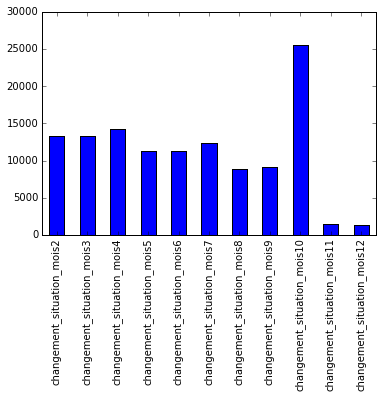

In [16]:
(df[changement_situation_mois_list].sum(skipna=True)).plot(kind='bar')

On a ce pic en octobre pour un problème de représentation des cohortes dans le sample, à priori je loupe quelque chose quelque part. 

In [41]:
df[(df.changement_situation_mois10==1) ][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim','sali','rsti','choi','rga']].rga.value_counts()

AttributeError: 'DataFrame' object has no attribute 'changement_situation_mois10'

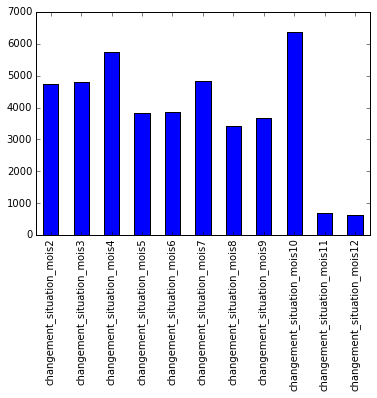

In [18]:
(df[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)][changement_situation_mois_list].sum(skipna=True)).plot(kind='bar')

Quel changement de séquences :

Activité à chomage et de chomage à activité:

In [19]:

######## Perte d'emploi #########  #Contient les passage à la retraite, en inactivité, etc
for month in range(2,13):
    changement_situation_mois = "perte_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]!=1) & (df[sitmois_minus_one]==1))


###### Fin Perte d'emploi#####



######## Gagne d'emploi #########
for month in range(2,13):
    changement_situation_mois = "gain_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]==1) & (df[sitmois_minus_one]!=1))

######## Gagne ou perd emploi #########
dftemp = pd.DataFrame()
for month in range(2,13):
    changement_situation_mois = "changement_situation_mois{}".format(month)
    dftemp["changement_situation_mois{}".format(month)] =  (df["gain_emploi_mois{}".format(month)].replace([True,False],['gain_emploi','']) +
                                                df["perte_emploi_mois{}".format(month)].replace([True,False],['perte_emploi',''])
                                              )
    



In [20]:
df["gain_emploi_mois{}".format(month)].replace(True,'gain_emploi').value_counts()

False          0.995161
gain_emploi    0.004839
dtype: float64

In [21]:
df2 = pd.melt(dftemp[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)])#.sum(skipna = True).plot(kind='bar', stacked = True)

In [22]:
df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)

value                               gain_emploi  perte_emploi
variable                                                     
changement_situation_mois10  46291         1712           486
changement_situation_mois11  47890          319           280
changement_situation_mois12  47929          254           306
changement_situation_mois2   48194          127           168
changement_situation_mois3   48150          140           199
changement_situation_mois4   47514          701           274
changement_situation_mois5   48179          170           140
changement_situation_mois6   48148          173           168
changement_situation_mois7   47548          577           364
changement_situation_mois8   48052          212           225
changement_situation_mois9   47893          318           278

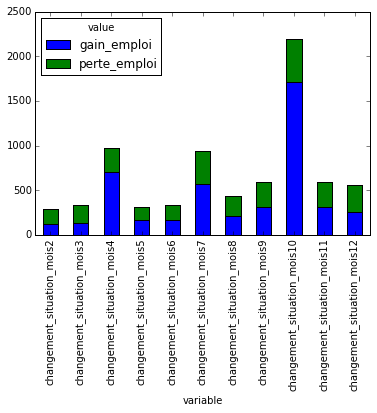

In [23]:
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['gain_emploi','perte_emploi']].plot(kind = 'bar',stacked = True)

In [24]:
 df3

value                                           variable         gain_emploi  \
variable                                                                       
changement_situation_mois2    changement_situation_mois2  48194          127   
changement_situation_mois3    changement_situation_mois3  48150          140   
changement_situation_mois4    changement_situation_mois4  47514          701   
changement_situation_mois5    changement_situation_mois5  48179          170   
changement_situation_mois6    changement_situation_mois6  48148          173   
changement_situation_mois7    changement_situation_mois7  47548          577   
changement_situation_mois8    changement_situation_mois8  48052          212   
changement_situation_mois9    changement_situation_mois9  47893          318   
changement_situation_mois10  changement_situation_mois10  46291         1712   
changement_situation_mois11  changement_situation_mois11  47890          319   
changement_situation_mois12  changement_situation_mois12  47929          254   

value                        perte_emploi  
variable                                   
changement_situation_mois2            168  
changement_situation_mois3            199  
changement_situation_mois4            274  
changement_situation_mois5            140  
changement_situation_mois6            168  
changement_situation_mois7            364  
changement_situation_mois8            225  
changement_situation_mois9            278  
changement_situation_mois10           486  
changement_situation_mois11           280  
changement_situation_mois12           306

In [25]:

######## Perte d'emploi #########  #Contient les passage à la retraite, en inactivité, etc
for month in range(2,13):
    changement_situation_mois = "perte_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]!=1)& (df[sitmois]!=4) & (df[sitmois_minus_one]==1))

###### Fin Perte d'emploi#####



##### Passage à la retraite ####
for month in range(2,13):
    changement_situation_mois = "passage_retraite_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)

    df[changement_situation_mois] = ((df[sitmois]==4) & (df[sitmois_minus_one]==1)) # TODO: voir si on loupe pas d'autre retaité (voir actrec et rsti ?)


##### Fin Passage à la retraite ####





##### Sortie du chomage vers l'emploi####
for month in range(2,13):
    changement_situation_mois = "sortie_chomage_to_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois]==1) & (df[sitmois_minus_one]==3)) # TODO: voir si on loupe pas d'autre retaité (voir actrec et rsti ?)


##### Sortie du chomage vers inactivité####
for month in range(2,13):
    changement_situation_mois = "sortie_chomage_to_inactivity_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = (((df[sitmois]==5)|(df[sitmois]==6)) & (df[sitmois_minus_one]==3))

##### Sortie du inactivité vers chomage ####
for month in range(2,13):
    changement_situation_mois = "sortie_inactivity_to_chomage_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = (((df[sitmois_minus_one]==5)|(df[sitmois_minus_one]==6)) & (df[sitmois]==3))       


##### Sortie du inactivité vers l'emploi####
for month in range(2,13):
    changement_situation_mois = "sortie_inact_to_emploi_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois]==1) & ((df[sitmois_minus_one]==6)|(df[sitmois_minus_one]==5)))                                

##### Sortie du inactivité vers cho####
for month in range(2,13):
    changement_situation_mois = "sortie_inact_to_chomage_mois{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois]==3) & ((df[sitmois_minus_one]==6)|(df[sitmois_minus_one]==5)))
    
#### Sortie études ###

for month in range(2,13):
    changement_situation_mois = "sortie_etudes_to_else{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois_minus_one]==2) & (df[sitmois]!=2))

In [26]:
#Sortie etudes en profondeur
for month in range(2,13):
    changement_situation_mois = "sortie_etudes_to_cho{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois_minus_one]==2) & (df[sitmois]==3))
for month in range(2,13):
    changement_situation_mois = "sortie_etudes_to_inact{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois_minus_one]==2) & ((df[sitmois]==5)|(df[sitmois]==6)))
for month in range(2,13):
    changement_situation_mois = "sortie_etudes_to_act{}".format(month)
    sitmois_minus_one = "situation_mois{}".format(month-1)
    sitmois = "situation_mois{}".format(month)
    df[changement_situation_mois] = ((df[sitmois_minus_one]==2) & (df[sitmois]==1))

In [27]:
dftemp = pd.DataFrame()
for month in range(2,13):
    changement_situation_mois = "changement_situation_mois{}".format(month)
    dftemp["changement_situation_mois{}".format(month)] =  (df["sortie_etudes_to_act{}".format(month)].replace([True,False],['etu_to_act','']) +
                                                df["sortie_etudes_to_inact{}".format(month)].replace([True,False],['etu_to_inact','']) +
                                                df["sortie_etudes_to_cho{}".format(month)].replace([True,False],['etu_to_cho','']) 
                                                            
                                              )

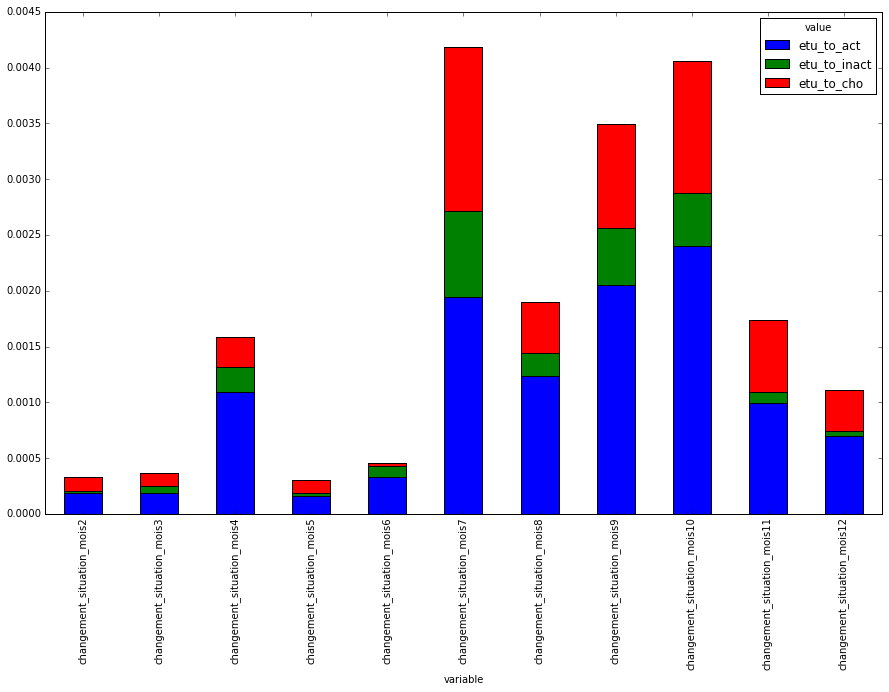

In [28]:
df2 = pd.melt(dftemp[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)])#.sum(skipna = True).plot(kind='bar', stacked = True)
hello = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
frequency = [array[0] for array in hello.values]
frequency = [[array]*hello.values.shape[1] for array in frequency]
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
#df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['etu_to_act','etu_to_inact','etu_to_cho']].plot(kind = 'bar',stacked = True, figsize=(15,9) )

plt.savefig("sequences_etudiants.png")

In [29]:
dftemp = pd.DataFrame()
for month in range(2,13):
    changement_situation_mois = "changement_situation_mois{}".format(month)
    dftemp["changement_situation_mois{}".format(month)] =  (df["perte_emploi_mois{}".format(month)].replace([True,False],['perte_emploi','']) +
                                                df["passage_retraite_mois{}".format(month)].replace([True,False],['passage_retraite','']) +
                                                
                                                 df["sortie_chomage_to_emploi_mois{}".format(month)].replace([True,False],['sortie_chomage','']) +
                                                 df["sortie_chomage_to_inactivity_mois{}".format(month)].replace([True,False],['passage_cho_to_inact','']) +
                                                 df["sortie_inact_to_chomage_mois{}".format(month)].replace([True,False],['passage_inact_to_cho','']) +           
                                                 df["sortie_inact_to_emploi_mois{}".format(month)].replace([True,False],['inact_to_act','']) +
                                                 df["sortie_etudes_to_else{}".format(month)].replace([True,False],['etu_to_else',''])
                                                            
                                              )

In [30]:
df2 = pd.melt(dftemp[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)])#.sum(skipna = True).plot(kind='bar', stacked = True)

In [31]:
df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)

value                               etu_to_else  inact_to_act  \
variable                                                        
changement_situation_mois10  47362          203            69   
changement_situation_mois11  47830           85            68   
changement_situation_mois12  47882           54            25   
changement_situation_mois2   48175           16            18   
changement_situation_mois3   48128           19            15   
changement_situation_mois4   47765           83            54   
changement_situation_mois5   48160           15            23   
changement_situation_mois6   48132           22            27   
changement_situation_mois7   47598          213            48   
changement_situation_mois8   48003           92            26   
changement_situation_mois9   47800          169            41   

value                        passage_cho_to_inact  passage_inact_to_cho  \
variable                                                                  
changement_situation_mois10                    72                    87   
changement_situation_mois11                     9                    16   
changement_situation_mois12                     6                    27   
changement_situation_mois2                      4                    12   
changement_situation_mois3                      5                    11   
changement_situation_mois4                     58                    67   
changement_situation_mois5                      4                     9   
changement_situation_mois6                      1                    10   
changement_situation_mois7                     66                    52   
changement_situation_mois8                      4                    13   
changement_situation_mois9                      4                    22   

value                        passage_retraite  perte_emploi  sortie_chomage  
variable                                                                     
changement_situation_mois10                34           452             210  
changement_situation_mois11                30           250             201  
changement_situation_mois12                20           286             189  
changement_situation_mois2                 26           142              96  
changement_situation_mois3                 20           179             112  
changement_situation_mois4                 26           248             188  
changement_situation_mois5                 11           129             138  
changement_situation_mois6                 12           156             129  
changement_situation_mois7                 29           335             148  
changement_situation_mois8                 17           208             126  
changement_situation_mois9                 20           258             175

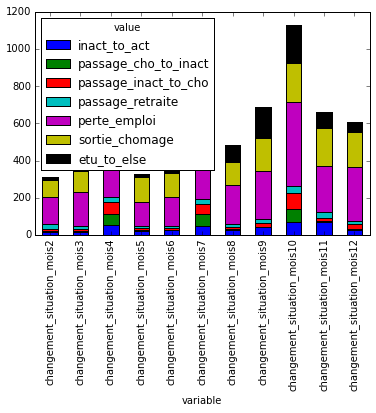

In [32]:
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['inact_to_act','passage_cho_to_inact','passage_inact_to_cho','passage_retraite','perte_emploi','sortie_chomage','etu_to_else']].plot(kind = 'bar',stacked = True)

In [33]:
df3.iloc[2]

value
variable                changement_situation_mois4
                                             47765
etu_to_else                                     83
inact_to_act                                    54
passage_cho_to_inact                            58
passage_inact_to_cho                            67
passage_retraite                                26
perte_emploi                                   248
sortie_chomage                                 188
Name: changement_situation_mois4, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e6bced0>], dtype=object)

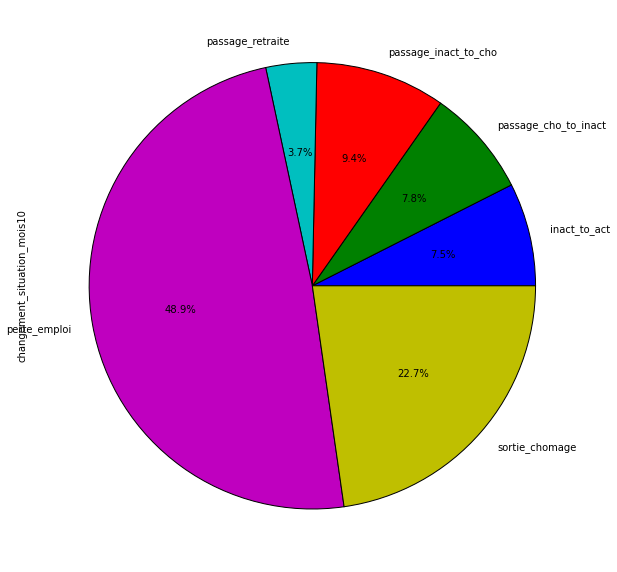

In [34]:
df3.iloc[8][['inact_to_act','passage_cho_to_inact','passage_inact_to_cho','passage_retraite','perte_emploi','sortie_chomage']].plot(
    kind = 'pie',subplots= True, figsize = (10,10), autopct='%1.1f%%')

In [54]:
#sommé sur l'année

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e6cbe50>], dtype=object)

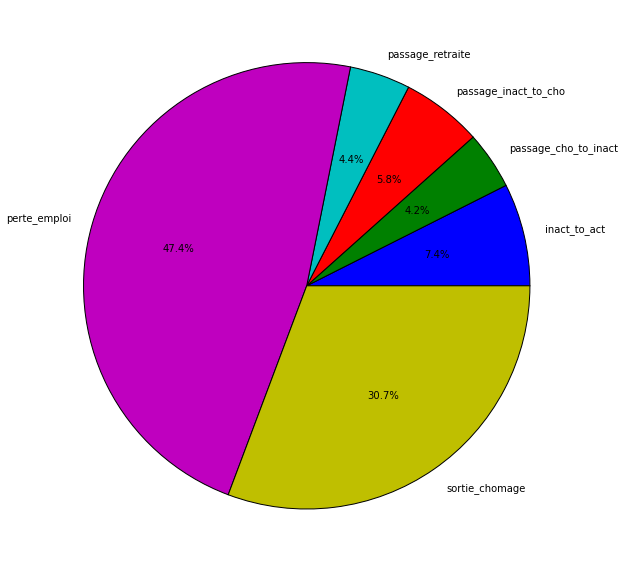

In [35]:
df3.sum(0)[['inact_to_act','passage_cho_to_inact','passage_inact_to_cho','passage_retraite','perte_emploi','sortie_chomage']].plot(
    kind = 'pie',subplots= True, figsize = (10,10), autopct='%1.1f%%', label='')
#plt.savefig("sequences_camembert.png")


In [36]:
df3[[['inact_to_act','passage_cho_to_inact','passage_inact_to_cho','passage_retraite','perte_emploi','sortie_chomage']].plot(
    kind = 'pie',subplots= True, figsize = (10,10), autopct='%1.1f%%')

SyntaxError: invalid syntax (<ipython-input-36-44fd4e5e9f73>, line 2)

In [37]:

hello = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
hello.values
frequency = [array[0] for array in hello.values] ; [[array]*6 for array in frequency]
#frequency2 = [array[0] for array in frequency]

[[47362, 47362, 47362, 47362, 47362, 47362],
 [47830, 47830, 47830, 47830, 47830, 47830],
 [47882, 47882, 47882, 47882, 47882, 47882],
 [48175, 48175, 48175, 48175, 48175, 48175],
 [48128, 48128, 48128, 48128, 48128, 48128],
 [47765, 47765, 47765, 47765, 47765, 47765],
 [48160, 48160, 48160, 48160, 48160, 48160],
 [48132, 48132, 48132, 48132, 48132, 48132],
 [47598, 47598, 47598, 47598, 47598, 47598],
 [48003, 48003, 48003, 48003, 48003, 48003],
 [47800, 47800, 47800, 47800, 47800, 47800]]

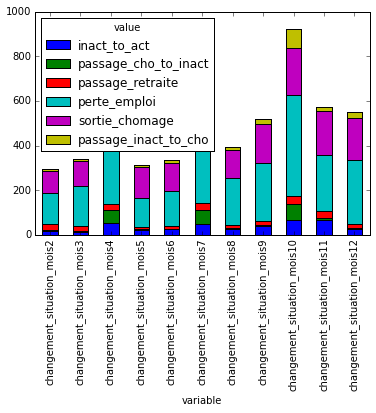

In [38]:
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['inact_to_act','passage_cho_to_inact','passage_retraite','perte_emploi','sortie_chomage','passage_inact_to_cho']].plot(kind = 'bar',stacked = True)

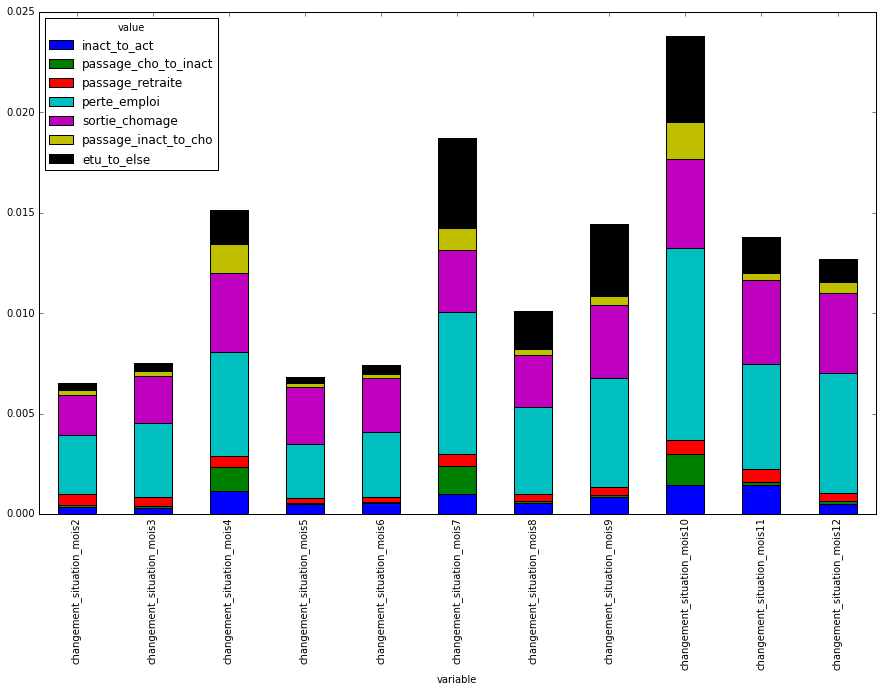

In [39]:
frequency = [array[0] for array in hello.values]
frequency = [[array]*hello.values.shape[1] for array in frequency]
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
#df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['inact_to_act','passage_cho_to_inact','passage_retraite','perte_emploi','sortie_chomage','passage_inact_to_cho','etu_to_else']].plot(kind = 'bar',stacked = True, figsize=(15,9) )

plt.savefig('passage_barplot.png')


In [40]:
hello.values.shape

(11, 8)

In [41]:
frequency = [array[0] for array in hello.values]
frequency = [[array]*6 for array in frequency]
df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
#df3 = df2.groupby(['variable', 'value'])['value'].count().unstack('value').fillna(0)/np.array(frequency)
month_sit = ["changement_situation_mois{}".format(month) for month in range(2,13)]
mapping = {month: i for i, month in enumerate(month_sit)}
df3.reset_index(inplace = True)
key = df3['variable'].map(mapping)
df3 = df3.iloc[key.argsort()]
df3.set_index(df3.variable, inplace = True)
df3[['inact_to_act','passage_cho_to_inact','passage_retraite','perte_emploi','sortie_chomage']].plot(kind = 'bar',stacked = True, figsize=(15,9) )

ValueError: Shape of passed values is (6, 11), indices imply (8, 11)

# Changement de plus de 10% de revenu :

In [42]:
##### Assigniation des sali choi et rsti mensuel####

nb_mois_actif = (df[sit_mois_list]==1).sum(1)
nb_mois_chomeur = (df[sit_mois_list]==3).sum(1)
nb_mois_ss_rev_act = ((df[sit_mois_list]== 2) | (df[sit_mois_list]== 4)| (df[sit_mois_list]== 5) |  (df[sit_mois_list]== 6)).sum(1)
nb_mois_retraite = (df[sit_mois_list]==4).sum(1)  #les séquences des retraités sont bisare, parfois renségnées parfois non


# Nb de mois de retraite : si retraité == 4 sur un mois et jamais égal à 1,3,5,6 alors nb_mois = 12

est_retraite_during_year = ((df[sit_mois_list]==4).sum(1) <12) & ((df[sit_mois_list]==4).sum(1) >0)



is_in_target_sample = (df.rga == 6) | (df.rga == 5) | (df.rga == 4)
df["is_in_target_sample"] = is_in_target_sample


nest_pas_retraite_during_year = (((df[sit_mois_list]==4).sum(1) >1)                 #TODO : regarder la différence entre NaN et 0 dans situation_mois
                                    | ((df[sit_mois_list]==3).sum(1) >1)
                                    | ((df[sit_mois_list]==5).sum(1) >1)
                                    | ((df[sit_mois_list]==6).sum(1) >1))

df[est_retraite_during_year & nest_pas_retraite_during_year & is_in_target_sample]==0 #TODO : le matin, mettre les is_in_target_sample dans le step one !

for month in range(1,13):
    sitmois = "situation_mois{}".format(month)
    salaire_mois = "sali_mois{}".format(month)
    chomage_mois = "choi_mois{}".format(month)
    retraite_mois = "rsti_mois{}".format(month)
    revenu_mois = "revi_mois{}".format(month)


    df[salaire_mois] = df[(df[sitmois] == 1)]['sali']/nb_mois_actif
    #indivi[salaire_mois] = indivi[(indivi[sitmois] == 1) & (indivi[nb_mois_actif>0 ])]['sali']/nb_mois_actif
    df[chomage_mois] = df[df[sitmois] == 3]['choi']/nb_mois_chomeur
    df[retraite_mois] = df[df[sitmois] == 4]['rsti']/nb_mois_retraite
    df[retraite_mois] = df[df[sitmois] == 2]['rsti']/nb_mois_retraite

    df[revenu_mois] = df[salaire_mois].fillna(0) + df[chomage_mois].fillna(0) + df[retraite_mois].fillna(0)
revenu_mois_list = ["revi_mois{}".format(month) for month in range(1,13)]

In [43]:
df[df.revi_mois2.values == np.inf][revenu_mois_list+['sali','rsti','choi']+sit_mois_list]

revi_mois1  revi_mois2   revi_mois3   revi_mois4   revi_mois5  \
1224     126.125000         inf  1713.000000   126.125000   126.125000   
2672            inf         inf          inf          inf          inf   
4635            inf         inf          inf          inf          inf   
4926            inf         inf          inf          inf          inf   
8357            inf         inf          inf          inf          inf   
8463            inf         inf          inf          inf          inf   
12524           inf         inf          inf          inf          inf   
13154   3228.000000         inf          inf          inf          inf   
14344           inf         inf          inf          inf          inf   
14704           inf         inf          inf          inf          inf   
15034           inf         inf          inf          inf          inf   
15467           inf         inf          inf          inf          inf   
15945           inf         inf          inf          inf          inf   
16090           inf         inf          inf          inf          inf   
17079           inf         inf          inf          inf          inf   
18779           inf         inf          inf          inf          inf   
19014           inf         inf          inf          inf          inf   
19962           inf         inf          inf          inf          inf   
20525           inf         inf          inf          inf          inf   
21396           inf         inf          inf          inf          inf   
23684           inf         inf          inf          inf          inf   
23685           inf         inf          inf          inf          inf   
24977           inf         inf          inf          inf          inf   
26659           inf         inf          inf          inf          inf   
26709           inf         inf          inf          inf          inf   
30899           inf         inf          inf          inf          inf   
30900           inf         inf          inf          inf          inf   
32733           inf         inf          inf          inf          inf   
32734           inf         inf          inf          inf          inf   
41240           inf         inf          inf          inf          inf   
41425           inf         inf          inf          inf          inf   
43637           inf         inf          inf          inf          inf   
43935           inf         inf          inf          inf          inf   
47522           inf         inf          inf          inf          inf   
47530           inf         inf          inf          inf          inf   
48346           inf         inf          inf          inf          inf   
49139           inf         inf          inf          inf          inf   
52428           inf         inf          inf          inf          inf   
52877           inf         inf          inf          inf          inf   
53866           inf         inf          inf          inf          inf   
55989           inf         inf          inf          inf          inf   
56572           inf         inf          inf          inf          inf   
58189           inf         inf          inf          inf          inf   
58190           inf         inf          inf          inf          inf   
59359           inf         inf          inf   819.333333   819.333333   
62458           inf         inf          inf          inf          inf   
63005   1751.333333         inf          inf          inf          inf   
63697           inf         inf          inf          inf          inf   
63758           inf         inf          inf          inf          inf   
63759           inf         inf          inf          inf          inf   
64071           inf         inf          inf          inf          inf   
64700           inf         inf          inf          inf          inf   
64701           inf         inf          inf          inf          inf   
64828        

In [44]:
df_revi_inf = df[df.revi_mois2.values == np.inf][revenu_mois_list+['sali','rsti','choi']+sit_mois_list]

In [45]:
(df_revi_inf[revenu_mois_list]==np.inf).sum(1).value_counts() #mettre les revenus en divisé par mois pour ceux à l'infini

1     0.0125
3     0.0375
5     0.0125
8     0.0500
9     0.1500
11    0.0750
12    0.6625
dtype: float64

In [46]:
df_revi_inf[(df_revi_inf[revenu_mois_list]==np.inf).sum(1)==12]

revi_mois1  revi_mois2  revi_mois3  revi_mois4  revi_mois5  \
2672           inf         inf         inf         inf         inf   
4635           inf         inf         inf         inf         inf   
4926           inf         inf         inf         inf         inf   
14344          inf         inf         inf         inf         inf   
15034          inf         inf         inf         inf         inf   
15467          inf         inf         inf         inf         inf   
15945          inf         inf         inf         inf         inf   
16090          inf         inf         inf         inf         inf   
17079          inf         inf         inf         inf         inf   
18779          inf         inf         inf         inf         inf   
19962          inf         inf         inf         inf         inf   
21396          inf         inf         inf         inf         inf   
23684          inf         inf         inf         inf         inf   
23685          inf         inf         inf         inf         inf   
24977          inf         inf         inf         inf         inf   
26659          inf         inf         inf         inf         inf   
26709          inf         inf         inf         inf         inf   
30899          inf         inf         inf         inf         inf   
30900          inf         inf         inf         inf         inf   
32734          inf         inf         inf         inf         inf   
43637          inf         inf         inf         inf         inf   
43935          inf         inf         inf         inf         inf   
47522          inf         inf         inf         inf         inf   
47530          inf         inf         inf         inf         inf   
49139          inf         inf         inf         inf         inf   
52428          inf         inf         inf         inf         inf   
52877          inf         inf         inf         inf         inf   
53866          inf         inf         inf         inf         inf   
55989          inf         inf         inf         inf         inf   
56572          inf         inf         inf         inf         inf   
58190          inf         inf         inf         inf         inf   
63758          inf         inf         inf         inf         inf   
63759          inf         inf         inf         inf         inf   
64071          inf         inf         inf         inf         inf   
64700          inf         inf         inf         inf         inf   
64701          inf         inf         inf         inf         inf   
71880          inf         inf         inf         inf         inf   
71881          inf         inf         inf         inf         inf   
76285          inf         inf         inf         inf         inf   
82834          inf         inf         inf         inf         inf   
83042          inf         inf         inf         inf         inf   
83240          inf         inf         inf         inf         inf   
85190          inf         inf         inf         inf         inf   
88530          inf         inf         inf         inf         inf   
89822          inf         inf         inf         inf         inf   
89966          inf         inf         inf         inf         inf   
90960          inf         inf         inf         inf         inf   
92807          inf         inf         inf         inf         inf   
94446          inf         inf         inf         inf         inf   
97543          inf         inf         inf         inf         inf   
97630          inf         inf         inf         inf         inf   
106531         inf         inf         inf         inf         inf   
110359         inf         inf         inf         inf         inf   

        revi_mois6  revi_mois7  revi_mois8  revi_mois9  revi_mois10  \
2672           inf         inf         inf         inf          inf   
4635           inf         inf         inf         inf          inf   
4926          

In [47]:
#94 individus ont des revenus infini
df[(df[revenu_mois_list]==np.inf).sum(1)>0].shape

(111, 852)

In [48]:

for month in range(1,13):
    sitmois = "situation_mois{}".format(month)
    salaire_mois = "sali_mois{}".format(month)
    chomage_mois = "choi_mois{}".format(month)
    retraite_mois = "rsti_mois{}".format(month)
    revenu_mois = "revi_mois{}".format(month)
    
    df.loc[(df[revenu_mois_list]==np.inf).sum(1)>0, revenu_mois] = (df['sali'] + df['rsti'] + df['choi'])/12

In [49]:
df.revi_mois1.max()

69274.0

In [50]:
df.sort('revi_mois1', ascending = False)[revenu_mois_list+sit_mois_list+['sali','rsti','choi','age']]

revi_mois1    revi_mois2    revi_mois3    revi_mois4    revi_mois5  \
37639   69274.000000  69274.000000  69274.000000  69274.000000  69274.000000   
14875   67261.000000  67261.000000  67261.000000  67261.000000  67261.000000   
84569   43071.500000  43071.500000  43071.500000  43071.500000  43071.500000   
108371  39152.000000      0.000000      0.000000      0.000000      0.000000   
81517   36134.250000  36134.250000  36134.250000  36134.250000  36134.250000   
92104   33912.000000   5086.181818   5086.181818   5086.181818   5086.181818   
28577   31667.500000  31667.500000  31667.500000  31667.500000  31667.500000   
65555   30870.750000  30870.750000  30870.750000  30870.750000  30870.750000   
41632   30229.916667  30229.916667  30229.916667  30229.916667  30229.916667   
70984   28881.416667  28881.416667  28881.416667  28881.416667  28881.416667   
14166   28646.833333  28646.833333  28646.833333  28646.833333  28646.833333   
99884   27425.166667  27425.166667  27425.166667  27425.166667  27425.166667   
15074   27106.000000      0.000000      0.000000      0.000000      0.000000   
67383   26909.916667  26909.916667  26909.916667  26909.916667  26909.916667   
5841    25198.916667  25198.916667  25198.916667  25198.916667  25198.916667   
62033   25116.250000  25116.250000  25116.250000  25116.250000  25116.250000   
81883   24647.666667  24647.666667  24647.666667  24647.666667  24647.666667   
72319   23136.666667  23136.666667  23136.666667  23136.666667  23136.666667   
96369   23092.333333  23092.333333  23092.333333  23092.333333  23092.333333   
44027   22697.583333  22697.583333  22697.583333  22697.583333  22697.583333   
91169   22396.083333  22396.083333  22396.083333  22396.083333  22396.083333   
104864  22129.500000  22129.500000  22129.500000  22129.500000      0.000000   
102936  22054.800000  22054.800000  22054.800000  22054.800000  22054.800000   
20177   21963.500000  21963.500000  21963.500000  21963.500000  21963.500000   
30860   21619.750000  21619.750000  21619.750000  21619.750000  21619.750000   
99961   21569.666667  21569.666667  21569.666667  21569.666667  21569.666667   
15646   21058.916667  21058.916667  21058.916667  21058.916667  21058.916667   
34158   19955.166667  19955.166667  19955.166667  19955.166667  19955.166667   
67555   19914.166667  19914.166667  19914.166667  19914.166667  19914.166667   
30861   19752.583333  19752.583333  19752.583333  19752.583333  19752.583333   
109048  19385.916667  19385.916667  19385.916667  19385.916667  19385.916667   
90434   19368.250000  19368.250000  19368.250000  19368.250000  19368.250000   
47275   19265.000000      0.000000      0.000000      0.000000      0.000000   
16997   19054.636364  19054.636364  19054.636364  19054.636364  19054.636364   
20720   18949.083333  18949.083333  18949.083333  18949.083333  18949.083333   
37209   18634.416667  18634.416667  18634.416667  18634.416667  18634.416667   
105297  18607.000000  18607.000000  18607.000000  18607.000000  18607.000000   
60267   17624.333333  17624.333333  17624.333333  17624.333333  17624.333333   
77043   17614.333333  17614.333333  17614.333333  17614.333333  17614.333333   
18134   17070.833333  17070.833333  17070.833333  17070.833333  17070.833333   
13598   16794.000000      0.000000      0.000000      0.000000      0.000000   
89016   16776.583333  16776.583333  16776.583333  16776.583333  16776.583333   
26301   16763.285714  16763.285714  16763.285714  16763.285714  16763.285714   
21835   16614.750000  16614.750000  16614.750000  16614.750000  16614.750000   
29209   16550.333333  16550.333333  16550.333333  16550.333333  16550.333333   
38742   16019.583333  16019.583333  16019.583333  16019.583333  16019.583333   
26247   16007.666667  16007.666667  16007.666667  16007.666667  16007.666667   
107587  15902.750000  15902.750000  15902.750000  15902.750000  15902.750000   
30476   15896.750000  15896.750000  15896.750000  15896.750000  15896.750000   
38785   15

Si un individu a 0 sur tout les mois sauf 1, il faut peut être redistribuer, concerne 231 individus

In [51]:
df[((df[revenu_mois_list]==0).sum(1)==11)].sort('revi_mois12', ascending = False)[revenu_mois_list+sit_mois_list+['sali','rsti','choi','age']]

revi_mois1  revi_mois2  revi_mois3  revi_mois4  revi_mois5  \
52089            0           0           0           0           0   
56928            0           0           0           0           0   
9785             0           0           0           0           0   
22551            0           0           0           0           0   
106562           0           0           0           0           0   
38829            0           0           0           0           0   
74740            0           0           0           0           0   
57583            0           0           0           0           0   
112363           0           0           0           0           0   
13791            0           0           0           0           0   
53280            0           0           0           0           0   
13840            0           0           0           0           0   
48382            0           0           0           0           0   
57245            0           0           0           0           0   
39437            0           0           0           0           0   
43950            0           0           0           0           0   
14140            0           0           0           0           0   
96902            0           0           0           0           0   
21065            0           0           0           0           0   
69138            0           0           0           0           0   
18870            0           0           0           0           0   
107363           0           0           0           0           0   
15497            0           0           0           0           0   
81345            0           0           0           0           0   
50564            0           0           0           0           0   
46677            0           0           0           0           0   
64674            0           0           0           0           0   
83659            0           0           0           0           0   
69845            0           0           0           0           0   
89461            0           0           0           0           0   
44196            0           0           0           0           0   
66950            0           0           0           0           0   
21767            0           0           0           0           0   
102674           0           0           0           0           0   
43817            0           0           0           0           0   
40049            0           0           0           0           0   
85504            0           0           0           0           0   
37800            0           0           0           0           0   
82021            0           0           0           0           0   
7774             0           0           0           0           0   
31998            0           0           0           0           0   
33952            0           0           0           0           0   
97358            0           0           0           0           0   
101521           0           0           0           0           0   
57156            0           0           0           0           0   
102881           0           0           0           0           0   
96627            0           0           0           0           0   
103753           0           0           0           0           0   
91631            0           0           0           0           0   
21557            0           0           0           0           0   
...            ...         ...         ...         ...         ...   
51086            0           0           0           0        1815   
51203         1078           0           0           0           0   
52717         1408           0           0           0           0   
53090         1020           0           0           0           0   
54886           71           0           0           0           0   
55342            0

In [52]:
original_df.iloc[4967]['sali']

7434.0

In [53]:
((df[revenu_mois_list]==0).sum(1)==11)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
          ...  
112376    False
112377    False
112378    False
112379    False
112380    False
112381    False
112382    False
112383    False
112384    False
112385    False
112386    False
112387  

In [54]:
df.head(10)[revenu_mois_list]


revi_mois1  revi_mois2  revi_mois3  revi_mois4  revi_mois5  revi_mois6  \
0       0.000       0.000       0.000       0.000       0.000           0   
1       0.000       0.000       0.000       0.000       0.000           0   
2       0.000       0.000       0.000       0.000       0.000           0   
3       0.000       0.000       0.000       0.000       0.000           0   
4       0.000       0.000       0.000       0.000       0.000           0   
5       0.000       0.000       0.000       0.000       0.000           0   
6     458.375     458.375     458.375     458.375     458.375        1539   
7       0.000       0.000       0.000       0.000       0.000           0   
8       0.000       0.000       0.000       0.000       0.000           0   
9    1413.000    1413.000    1413.000    1413.000    1413.000        1413   

   revi_mois7  revi_mois8  revi_mois9  revi_mois10  revi_mois11  revi_mois12  
0           0           0           0        0.000        0.000        0.000  
1           0           0           0        0.000        0.000        0.000  
2           0           0           0        0.000        0.000        0.000  
3           0           0           0        0.000        0.000        0.000  
4           0           0           0        0.000        0.000        0.000  
5           0           0           0        0.000        0.000        0.000  
6        1539        1539        1539      458.375      458.375      458.375  
7           0        6210        6210        0.000        0.000        0.000  
8           0           0           0        0.000        0.000        0.000  
9        1413        1413        1413     1413.000     1413.000     1413.000

In [55]:
df["diff_rev"] = df[revenu_mois_list].max(1) - df[revenu_mois_list].min(1)

In [56]:
filter_income = (df.sali>0)|(df.rsti>0)|(df.choi>0)
df[filter_income].shape

(74242, 853)

In [57]:
df[filter_income & (df.diff_rev<100)].shape[0]/df[filter_income].shape[0]

0.8326553702755852

In [58]:
%time
income_rep_func =[df[filter_income & (df.diff_rev<value)].shape[0]/df[filter_income].shape[0] for value in range(0,10000,100)]

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.87 µs


In [59]:
plt.figure(figsize=(15,9))
plt.plot(range_to_use[1:],income_rep_func[1:],label = 'Share of max variation during year')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.grid()


NameError: name 'range_to_use' is not defined

CPU times: user 3min 39s, sys: 2min 11s, total: 5min 50s
Wall time: 6min 5s


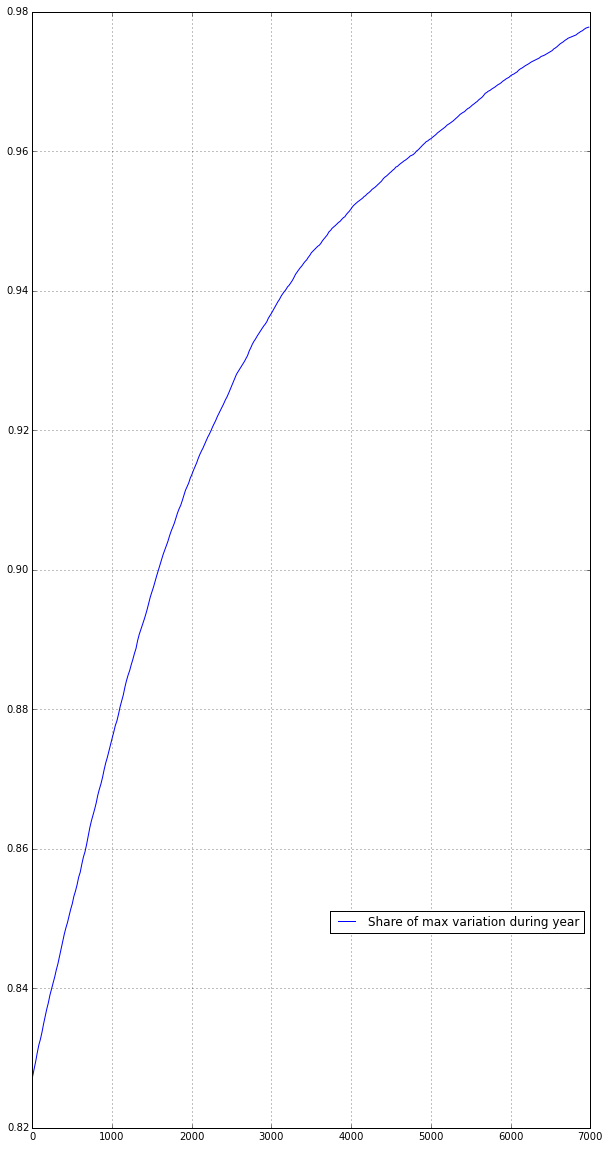

In [60]:
%%time
range_to_use = range(1,7000,20)
income_rep_func =[df[filter_income & (df.diff_rev<income)].shape[0]/df[filter_income].shape[0] for income in range_to_use]
plt.figure(figsize = (10,20))
plt.plot(range_to_use,income_rep_func,label = 'Share of max variation during year')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.grid()



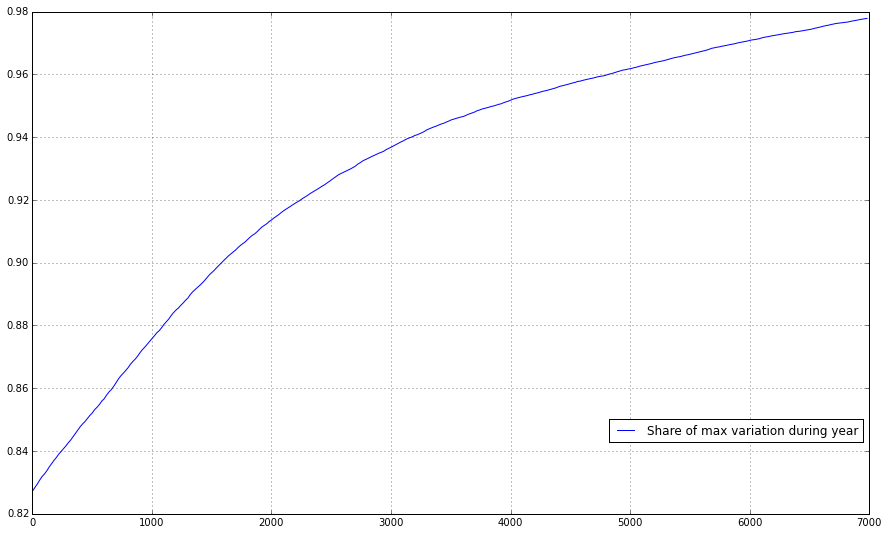

In [61]:
plt.figure(figsize = (15,9))
plt.plot(range_to_use,income_rep_func,label = 'Share of max variation during year')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.grid()
plt.savefig('share_of_max_variation.png')

(0, 800)

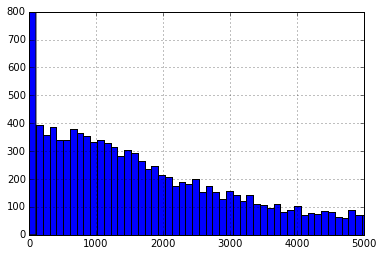

In [74]:
df.diff_rev.hist(bins = 2600)
plt.xlim(0,5000)
plt.ylim(0,800)

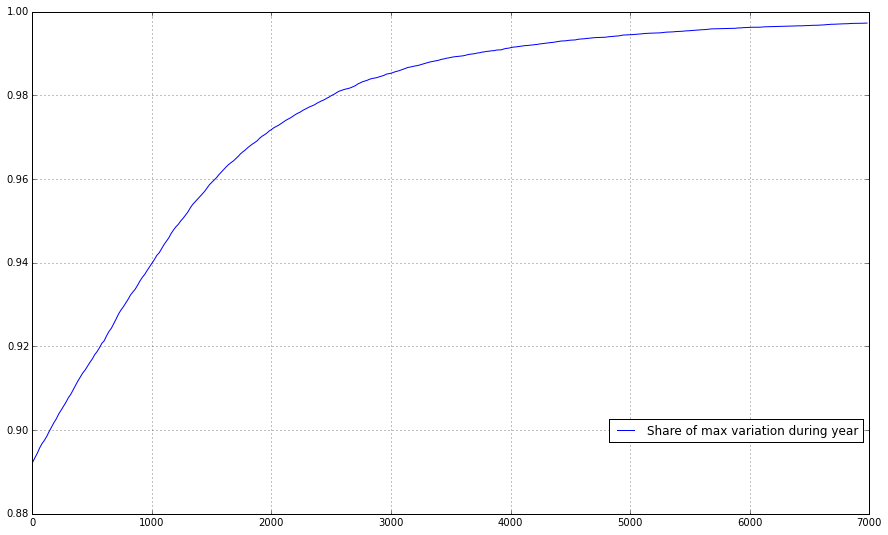

In [98]:
plt.figure(figsize=(15,9))
plt.plot(range_to_use,income_rep_func,label = 'Share of max variation during year')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.grid()
plt.figure(figsize = (10,20))


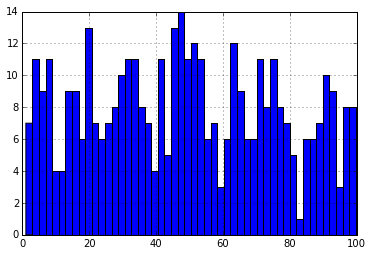

In [75]:
df[(df.diff_rev>1)&(df.diff_rev<100)].diff_rev.hist(bins = 50)

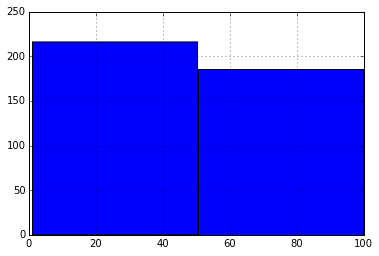

In [76]:
df[(df.diff_rev>1)&(df.diff_rev<100)].diff_rev.hist(bins = 2)

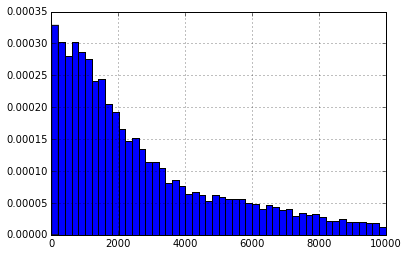

In [77]:
#Relatif
df[(df.diff_rev>10)&(df.diff_rev<10000)].diff_rev.hist(bins = 50, normed = True)

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


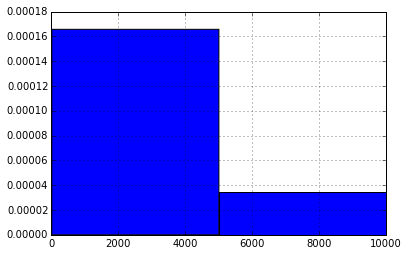

In [78]:
#Relatif
df[filter_income][(df.diff_rev>10)&(df.diff_rev<10000)].diff_rev.hist(bins = 2, normed = True)

In [103]:
from matplotlib import pyplot as plt
plt.hist()

TypeError: hist() takes at least 1 argument (0 given)

In [104]:
df_ols = df[['age','sali','rsti','choi','']]

KeyError: "[''] not in index"

In [105]:
pd.ols(y = df[(df.diff_rev>10)&(df.diff_rev<10000)].diff_rev, x = df_ols)

NameError: name 'df_ols' is not defined

In [106]:
(df.diff_rev>100).value_counts(False)

False    93188
True      6843
dtype: int64

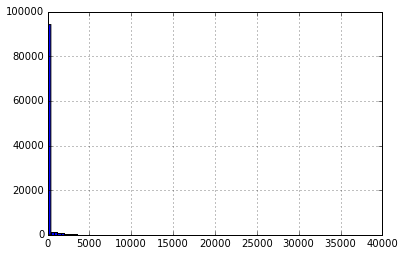

In [107]:
df.diff_rev.hist(bins = 100)

In [108]:
df[(df.diff_rev>1000)][revenu_mois_list+sit_mois_list+['sali','rsti','choi','age']]

revi_mois1   revi_mois2   revi_mois3   revi_mois4   revi_mois5  \
6         458.375000   458.375000   458.375000   458.375000   458.375000   
7           0.000000     0.000000     0.000000     0.000000     0.000000   
18        947.100000   947.100000   947.100000   947.100000   947.100000   
19          0.000000     0.000000     0.000000     0.000000     0.000000   
63          0.000000     0.000000     0.000000     0.000000     0.000000   
80        533.166667  2124.166667  2124.166667  2124.166667  2124.166667   
137         0.000000     0.000000     0.000000     0.000000     0.000000   
139       382.833333   382.833333   382.833333   382.833333   382.833333   
146         0.000000     0.000000     0.000000     0.000000     0.000000   
153       399.000000   399.000000   399.000000   399.000000   399.000000   
202         0.000000     0.000000  1024.714286  1024.714286  1024.714286   
256         0.000000     0.000000     0.000000     0.000000     0.000000   
273      1059.375000  1059.375000  1059.375000  1059.375000  1059.375000   
304         0.000000     0.000000     0.000000     0.000000     0.000000   
313         0.000000  1469.090909  1469.090909  1469.090909  1469.090909   
331      1745.857143  1745.857143  1745.857143     0.000000     0.000000   
367       494.888889   494.888889   494.888889   494.888889   494.888889   
424      1864.500000  1864.500000  1864.500000  1864.500000  1864.500000   
434         0.000000     0.000000     0.000000  1751.000000  1751.000000   
472         0.000000  1468.600000  1468.600000     0.000000  1468.600000   
583      1143.714286  1143.714286  1143.714286  1143.714286  1143.714286   
586      1093.000000  1093.000000     0.000000     0.000000     0.000000   
678         0.000000     0.000000     0.000000     0.000000     0.000000   
683       914.000000   914.000000   914.000000   914.000000   914.000000   
771         0.000000     0.000000     0.000000     0.000000     0.000000   
804      2210.100000  2210.100000  2210.100000     0.000000     0.000000   
848         0.000000     0.000000     0.000000     0.000000     0.000000   
871      1216.000000  1216.000000  1216.000000  1216.000000  1216.000000   
899      2098.166667  2098.166667  2098.166667  2098.166667  2098.166667   
933      1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
938      2399.750000  2399.750000  2399.750000  2399.750000  2399.750000   
947      1129.833333  1129.833333  1129.833333  1129.833333  1129.833333   
952      2516.777778  2516.777778  2516.777778  2516.777778  2516.777778   
1045        0.000000  1299.333333  1299.333333  1299.333333  1299.333333   
1054        0.000000     0.000000     0.000000     0.000000     0.000000   
1060       75.500000    75.500000    75.500000    75.500000    75.500000   
1081      906.333333   906.333333   906.333333   906.333333   906.333333   
1143      391.800000   391.800000   391.800000   391.800000   391.800000   
1147     1186.181818  1186.181818  1186.181818     0.000000  1186.181818   
1174        0.000000     0.000000     0.000000  3503.666667  3503.666667   
1197        0.000000  3309.166667  3309.166667  3309.166667  3309.166667   
1198        0.000000     0.000000     0.000000     0.000000     0.000000   
1210      745.444444   745.444444   745.444444   745.444444   745.444444   
1212      547.400000   547.400000   547.400000   547.400000   547.400000   
1213      899.000000   899.000000  2523.750000   899.000000   899.000000   
1217     4914.363636     0.000000  4914.363636  4914.363636  4914.363636   
1218     1756.818182     0.000000  1756.818182  1756.818182  1756.818182   
1224      559.250000   559.250000  1713.000000   126.125000   126.125000   
1293     3301.000000  3301.000000  3301.000000  3301.000000  3301.000000   
1343     2862.625000  2862.625000  2862.625000  2862.625000  2862.625000   
...              ...          ...          ...          ...          ...   
110843   2804.625000  2804.625000  2804.625000  2804.62500

## Variation de plus de 10% par part de décile. ($10\% = \frac{max-min}{max}$) 

In [109]:
df["variation_en_proportion"] = (df[revenu_mois_list].max(1) - df[revenu_mois_list].min(1))/df[revenu_mois_list].max(1)

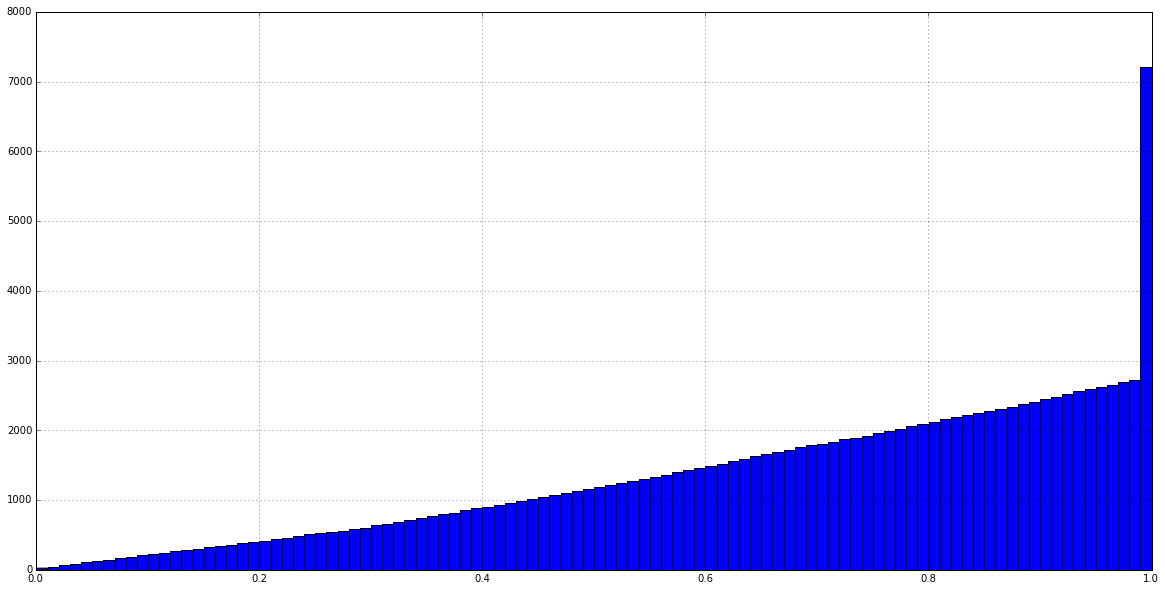

In [110]:
#REpartition de la perte en pourcentage entre ]0,1[
df[(df.variation_en_proportion>0) & (df.variation_en_proportion<=1)].variation_en_proportion.hist(bins=100, figsize =(20,10),cumulative=True)

In [111]:
df[(df.variation_en_proportion>0.1)&(df.variation_en_proportion<1)].shape

(2547, 858)

In [112]:
df[df.variation_en_proportion==1][revenu_mois_list+sit_mois_list+['sali','choi','rsti']] #on voit une grande partie des problèmes...

revi_mois1   revi_mois2   revi_mois3   revi_mois4   revi_mois5  \
7           0.000000     0.000000     0.000000     0.000000     0.000000   
19          0.000000     0.000000     0.000000     0.000000     0.000000   
63          0.000000     0.000000     0.000000     0.000000     0.000000   
137         0.000000     0.000000     0.000000     0.000000     0.000000   
139       382.833333   382.833333   382.833333   382.833333   382.833333   
146         0.000000     0.000000     0.000000     0.000000     0.000000   
202         0.000000     0.000000  1024.714286  1024.714286  1024.714286   
256         0.000000     0.000000     0.000000     0.000000     0.000000   
273      1059.375000  1059.375000  1059.375000  1059.375000  1059.375000   
304         0.000000     0.000000     0.000000     0.000000     0.000000   
313         0.000000  1469.090909  1469.090909  1469.090909  1469.090909   
331      1745.857143  1745.857143  1745.857143     0.000000     0.000000   
424      1864.500000  1864.500000  1864.500000  1864.500000  1864.500000   
434         0.000000     0.000000     0.000000  1751.000000  1751.000000   
466       728.750000   728.750000   728.750000   728.750000     0.000000   
472         0.000000  1468.600000  1468.600000     0.000000  1468.600000   
475       137.333333   137.333333   137.333333   137.333333   137.333333   
496         0.000000   918.272727   918.272727   918.272727   918.272727   
504         0.000000     0.000000   981.714286   981.714286   981.714286   
526         0.000000     0.000000     0.000000   658.000000   658.000000   
566         0.000000     0.000000     0.000000     0.000000   536.250000   
583      1143.714286  1143.714286  1143.714286  1143.714286  1143.714286   
586      1093.000000  1093.000000     0.000000     0.000000     0.000000   
610        51.666667    51.666667    51.666667    51.666667    51.666667   
618         0.000000     0.000000     0.000000     0.000000     0.000000   
678         0.000000     0.000000     0.000000     0.000000     0.000000   
700       582.666667   582.666667   582.666667   582.666667   582.666667   
758       244.555556   244.555556   244.555556   244.555556   244.555556   
764       336.333333   336.333333   336.333333   336.333333     0.000000   
771         0.000000     0.000000     0.000000     0.000000     0.000000   
790       905.454545   905.454545   905.454545   905.454545   905.454545   
804      2210.100000  2210.100000  2210.100000     0.000000     0.000000   
848         0.000000     0.000000     0.000000     0.000000     0.000000   
871      1216.000000  1216.000000  1216.000000  1216.000000  1216.000000   
899      2098.166667  2098.166667  2098.166667  2098.166667  2098.166667   
907       933.100000   933.100000   933.100000   933.100000   933.100000   
938      2399.750000  2399.750000  2399.750000  2399.750000  2399.750000   
947      1129.833333  1129.833333  1129.833333  1129.833333  1129.833333   
994         0.000000     0.000000     0.000000     0.000000     0.000000   
1045        0.000000  1299.333333  1299.333333  1299.333333  1299.333333   
1052        0.000000     0.000000     0.000000     0.000000     0.000000   
1054        0.000000     0.000000     0.000000     0.000000     0.000000   
1099        0.000000     0.000000   986.000000   986.000000   986.000000   
1144      508.181818   508.181818   508.181818   508.181818   508.181818   
1147     1186.181818  1186.181818  1186.181818     0.000000  1186.181818   
1169      745.000000   745.000000   745.000000   745.000000   745.000000   
1174        0.000000     0.000000     0.000000  3503.666667  3503.666667   
1177        0.000000     0.000000     0.000000     0.000000     0.000000   
1197        0.000000  3309.166667  3309.166667  3309.166667  3309.166667   
1198        0.000000     0.000000     0.000000     0.000000     0.000000   
...              ...          ...          ...          ...          ...   
111079      0.000000     0.000000     0.000000     0.00000

In [113]:
df[(df.variation_en_proportion>0.1)&(df.variation_en_proportion<1)]

noindiv  aac  acesse  acessep  acontr  acper  actanc acteu  acteu5  \
6       900000501    0       0        0       0      0       1     1       1   
18      900001001    0       0        2       0      0       1     1       2   
80      900003401    0       0        0       0      0       1     1       2   
153     900006401    1       1        0       0      1       3     3       5   
259     900010901    1       1        2       0      0       2     2       3   
302     900012901    0       0        2       0      0       1     1       1   
367     900015503    0       0        6       0      0       1     1       1   
388     900016401    0       1        0       0      0       2     2       3   
420     900017901    0       0        0       0      2       1     1       1   
435     900018802    0       0        2       0      0       1     1       1   
476     900021002    0       0        0       0      0       1     1       1   
572     900025501    0       1        2       0      2       2     2       3   
635     900028001    1       4        0       0      1       2     2       3   
683     900029802    0       0        4       0      0       1     1       1   
933     900041901    0       4        0       0      2       3     3       5   
952     900043002    1       4        0       0      0       3     3       5   
1060    900047501    0       0        6       0      0       1     1       1   
1081    900048702    2       4        0       0      1       3     3       5   
1143    900051101    0       1        0       1      1       1     1       1   
1210    900054001    1       1        1       0      1       2     2       3   
1212    900054003    0       0        0       0      0       1     1       1   
1213    900054101    1       1        0       1      0       1     1       1   
1224    900054402    1       5        1       0      2       2     2       3   
1225    900054403    1       1        0       0      1       2     2       3   
1240    900055002    0       1        0       0      2       3     3       5   
1321    900058402    0       0        5       0      0       1     1       1   
1343    900059301    0       0        4       0      0       1     1       1   
1385    900061502    0       0        2       0      0       1     1       1   
1392    900061901    1       1        4       0      1       2     2       3   
1409    900063002    0       0        5       0      0       1     1       1   
1434    900064001    0       0        5       0      0       1     1       1   
1435    900064002    0       1        0       0      1       2     2       3   
1436    900064101    1       5        0       0      1       3     3       5   
1437    900064102    0       0        1       0      2       1     1       1   
1448    900064501    2       0        0       0      1       2     2       3   
1462    900065101    1       6        1       0      0       3     3       5   
1463    900065102    1       1        0       0      0       2     2       3   
1471    900065501    1       1        0       1      0       1     1       1   
1520    900067603    0       0        1       0      0       1     1       1   
1591    900070701    0       1        1       0      1       2     2       3   
1592    900070702    1       5        4       0      1       2     2       3   
1741    900078301    1       4        4       0      1       2     2       3   
1786    900080401    0       0        0       0      0       1     1       1   
1793    900080503    1       1        0       0      1       2     2       3   
1796    900080603    0       0        0       0      0       1     1       1   
1816    900081701    1       1        2       0      0       2     2       3   
1817    900081801    0       0        0       0      2       1     1       1   
1829    900082201    0       0        0       0      0       1     1       1   
1887    900084802    0       0        4       0      0       1     1       1   
1935    90

In [114]:
df['revenu_imposable_annuel'] = df['sali'] + df['rsti'] + df['choi']

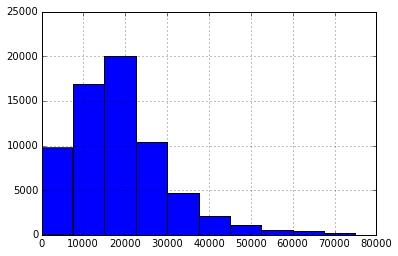

In [115]:
hello = df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<75000)].revenu_imposable_annuel.hist(bins = 10)

In [116]:
count,division = np.histogram(df[(df.revenu_imposable_annuel>0)].revenu_imposable_annuel,bins=10)

In [176]:
bins = df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)].revenu_imposable_annuel.quantile(np.arange(0,1.1,0.1));bins

0.0         1.0
0.1      5454.0
0.2      9364.0
0.3     12405.0
0.4     15012.6
0.5     17268.0
0.6     19645.0
0.7     22510.0
0.8     26561.4
0.9     33941.6
1.0    173976.0
dtype: float64

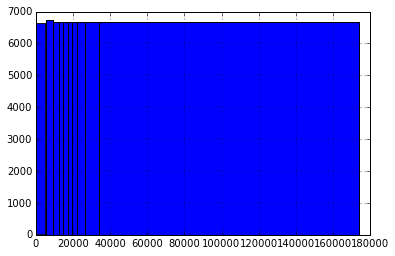

In [118]:
df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)].revenu_imposable_annuel.hist( bins = bins.values, range = (0,20000))

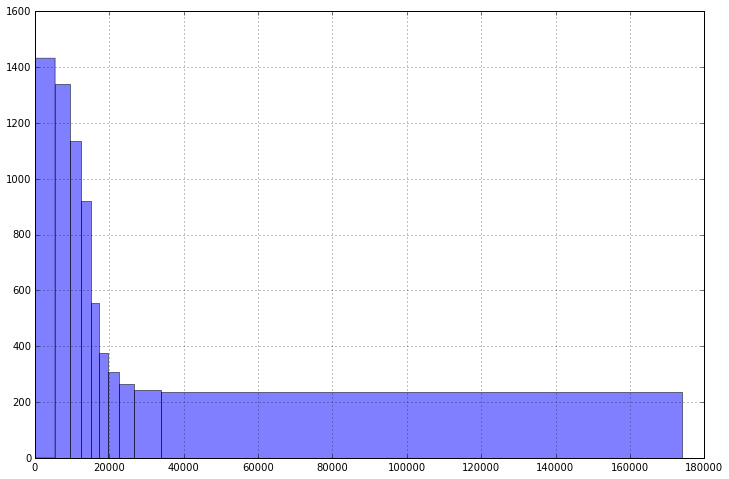

In [216]:
rev_max = 175000
df[((df.revenu_imposable_annuel>0)&
    (df.revenu_imposable_annuel<rev_max)) &
   (df.variation_en_proportion>0.2)].revenu_imposable_annuel.hist(
            bins = np.append(bins.values, rev_max), 
            figsize = (12,8),
            #normed = True,stacked = False,
            alpha = 0.5)

In [ ]:
df[((df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<rev_max)) & (df.variation_en_proportion>0.2)].shape

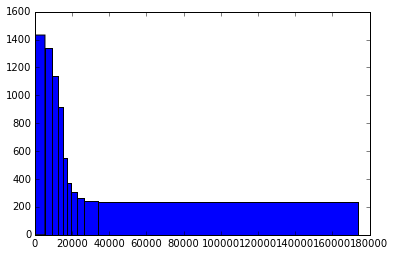

In [143]:
rev_max = 175000
bins_to_graph = df[(df.revenu_imposable_annuel>0)&
                   (df.revenu_imposable_annuel<175000)].revenu_imposable_annuel.quantile(np.arange(0,1.1,0.1))
n,bins,patches = plt.hist(df[((df.revenu_imposable_annuel>0)&
                              (df.revenu_imposable_annuel<rev_max)) & 
                             (df.variation_en_proportion>0.2)].revenu_imposable_annuel.values, 
                              bins= bins_to_graph.values)
#plt.setp(n[0]=198)
#plt.show()
#plt.setp()

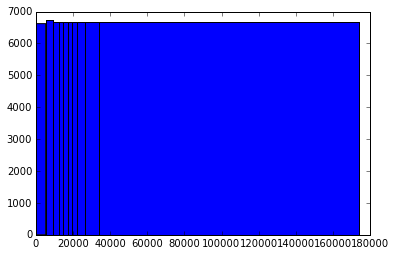

In [151]:
rev_max = 175000
bins_to_graph = df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)].revenu_imposable_annuel.quantile(np.arange(0,1.1,0.1))
n2,bins2,patches2 = plt.hist(df[((df.revenu_imposable_annuel>0)&
                                 (df.revenu_imposable_annuel<rev_max))].revenu_imposable_annuel.values,
                             bins= bins_to_graph.values)


In [163]:
n/n2

array([ 0.21624887,  0.19937509,  0.17021277,  0.13771917,  0.08303357,
        0.05607196,  0.04584957,  0.03955649,  0.03627098,  0.03551626])

<function matplotlib.pyplot.tick_params>

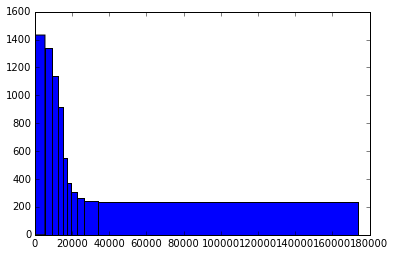

In [173]:

plt.hist(df[((df.revenu_imposable_annuel>0)&
                              (df.revenu_imposable_annuel<rev_max)) & 
                             (df.variation_en_proportion>0.2)].revenu_imposable_annuel.values, 
                              bins= bins_to_graph.values)
plt.tick_params()
#plt.yticks(n)

In [168]:
type(labels)

list

In [158]:
coucou.count

<function count>

In [186]:
n.shape

(10,)

In [197]:
bins2[1::]

array([   5454. ,    9364. ,   12405. ,   15012.6,   17268. ,   19645. ,
         22510. ,   26561.4,   33941.6,  173976. ])

In [204]:
width_list = []
for i in range(0,bins2.shape[0]-1):
    width_list.append(bins2[i]-bins2[i+1])
    
    

In [205]:
width_list

[-5453.0,
 -3910.0,
 -3041.0,
 -2607.6000000000022,
 -2255.3999999999978,
 -2377.0,
 -2865.0,
 -4051.4000000000087,
 -7380.1999999999825,
 -140034.40000000002]

<Container object of 10 artists>

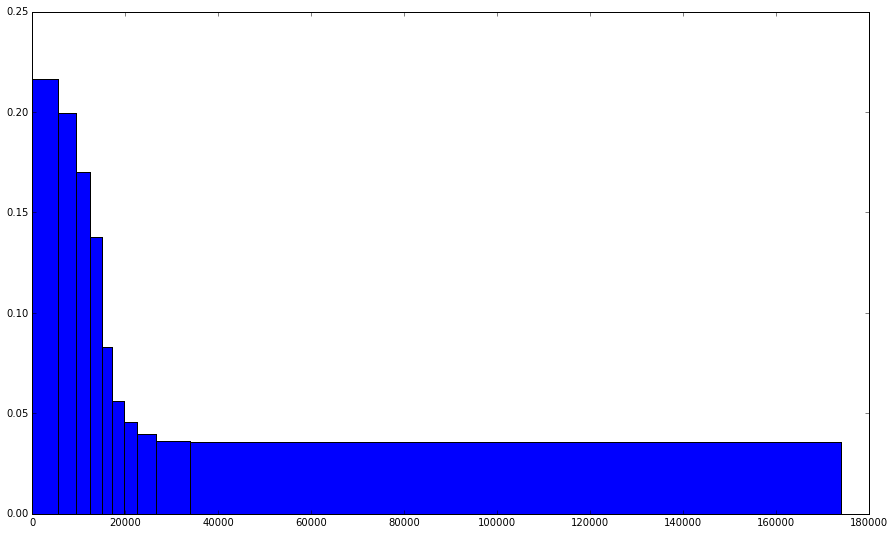

In [207]:
plt.figure(figsize=(15,9))
plt.bar( bins2[1::], n/n2,width = width_list)


In [214]:
bins2
n/n2

array([ 0.21624887,  0.19937509,  0.17021277,  0.13771917,  0.08303357,
        0.05607196,  0.04584957,  0.03955649,  0.03627098,  0.03551626])

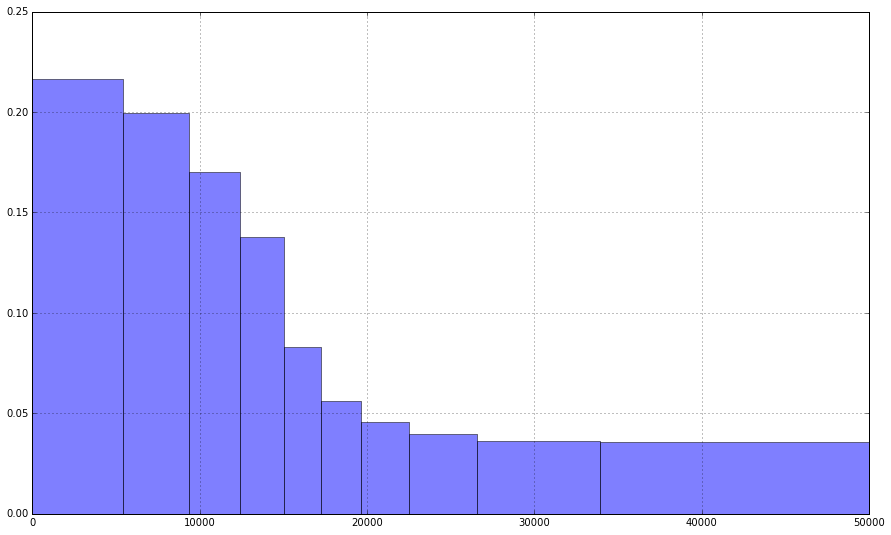

In [217]:
plt.figure(figsize=(15,9))
plt.bar( bins2[1::], n/n2,width = width_list, alpha = 0.5)
plt.grid()
plt.xlim([0,50000])
plt.savefig("part_plus_de_20_prct_par_decile.png")

In [122]:
type(bins.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [153]:
bins.values[0:10]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Container object of 10 artists>

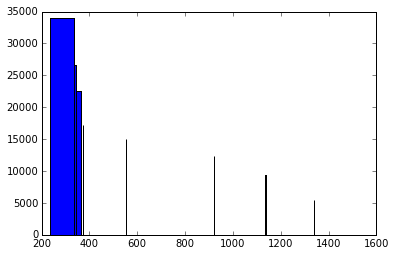

In [156]:
#plt.hist(n=n,bins=bins)
plt.bar(n,bins_to_graph.values[0:10],width = [100,1,1,1,1,1,1,100,100,100] )

In [ ]:
plt.figure()
hist2 = np.histogram(
    df[(df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)].revenu_imposable_annuel,
    bins=bins)

#mask = (hist2[1][:-1] < 20000) * (hist2[1][:-1] > 0)
#plt.bar(hist2[1][mask], hist2[0][mask], width=200)
plt.bar(hist2[1],hist2[0])

In [ ]:
hist2[0]

In [ ]:
hist2

In [ ]:
hello = bins.values.copy()
np.append(hello, 36)
plt.hist()

In [ ]:
df[((df.revenu_imposable_annuel>0)&(df.revenu_imposable_annuel<175000)) & (df.variation_en_proportion>0.1)].revenu_imposable_annuel

In [ ]:
df[(df.revenu_imposable_annuel>0)].revenu_imposable_annuel.quantile(0.5)

In [ ]:
dates = pd.date_range('2009','2010', freq = 'M')
dates

In [ ]:
a = pd.Series([True,0,0,False])
a.replace([True,False],['hello','goodbye'])

In [ ]:
False*'coucou'+True * 'hello'

In [ ]:
[True,False] == 'hello'

In [ ]:
df2 = df.groupby(['gain_ou_perte_emploi_mois2', 'gain_emploi_mois2']);df2.agecj()

In [ ]:
df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
df2[['abuse','nff']].plot(kind='bar', stacked=True)

In [ ]:
df[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)][
    ["gain_emploi_mois{}".format(mois) for mois in range(2,13)] +
    ["gain_emploi_mois{}".format(mois) for mois in range(2,13)]

    ].sum(skipna=True).plot(kind='bar', stacked = True)

In [ ]:
(df[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)][changement_situation_mois_list].sum(skipna=True)/
df[(df.rga == 1)|(df.rga == 5)|(df.rga == 6)][changement_situation_mois_list].count()
).plot(kind='bar')

In [ ]:
pd.melt(df[sit_mois_list])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
#ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, menMeans, width, color='r')
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
#plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
import seaborn as sns
sns.countplot(x= ['True'],data = df.T)

In [ ]:
sns.countplot(x = [1,2,3,4], data= [5,6,7,8])

In [ ]:
df.groupby([sit_mois_list]).sum()

In [ ]:
category_group=customers.groupby(['name','category']).sum()

In [ ]:
df.rga.value_counts()

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")
iris

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)

In [ ]:
sns.plt(df['sali'],df['rsti'])

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")


In [ ]:
df[df.changement_situation_mois10==True][['nb_sit_mois_null','quelfic']+sit_mois_list+['age','trim','sali','rsti','rga']]

In [ ]:
df.rga.value_counts()
    

In [ ]:
dfmois = pd.DataFrame()
for chgmt in nb_chgmt_mois_list:
    temp_df = pd.DataFrame()
    pd.concat(dfmois, )
    dfmois.df[chgmt].value_counts()[1]

In [ ]:
dfmois

In [ ]:
dfmois = pd.Series()
temp_df = pd.Series()

In [ ]:
temp_df['nb_chgmt'] = df["chgmt_sit_mois{}".format(month)].value_counts()[1]
temp_df['mois'] = mois

In [ ]:
temp_df.append(temp_df)

In [ ]:
type(df["chgmt_sit_mois{}".format(month)].value_counts()[1])

In [ ]:
df.chgmt_sit_mois12.value_counts()[1]

In [ ]:
df.changement_situation_mois10.isnull().all()

In [ ]:
#essai histogram decile

In [ ]:

data = np.random.normal(size=10000)*10000

#plt.figure(0)
#plt.hist(data, bins=np.arange(data.min(), data.max(), 1000))


In [ ]:
plt.hist(data, bins = 100)

In [ ]:
data = pd.Series(data)

In [ ]:
bins = data.quantile(np.arange(0,1.1,0.1))

In [ ]:
bins

In [ ]:
data.hist(bins = bins, normed = True)

In [ ]:
data.hist(bins = bins, normed = True,stacked = False, cumulative = True)

In [ ]:
bins